In [1]:
GPT2_VERSION = 'gpt2'
FILTER = 'unfiltered'


In [2]:
import winogender
from experiment import Model
from attention_utils import report_interventions_summary_by_head, report_interventions_summary_by_layer, report_intervention, perform_interventions, get_odds_ratio
from transformers import GPT2Tokenizer
import json
from pandas import DataFrame

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


In [3]:
fname = f'winobias_data/attention_intervention_results_{GPT2_VERSION}_{FILTER}.json'
with open(fname) as f:
	results = json.load(f)	

### Mean Effect

*** SUMMARY BY HEAD ***
Num interventions: 160
Mean total effect: 0.115

INDIRECT Effect (mean = 0.0007705336579065981)
Top 10 heads:
   5 8: 0.031 (p=0.0000)
   5 10: 0.022 (p=0.0000)
   4 6: 0.019 (p=0.0000)
   5 9: 0.018 (p=0.0000)
   6 0: 0.008 (p=0.0000)
   4 3: 0.006 (p=0.0000)
   7 1: 0.005 (p=0.0000)
   5 5: 0.004 (p=0.0003)
   7 5: 0.001 (p=0.2973)
   7 3: 0.001 (p=0.4381)

DIRECT Effect (mean = 0.11381693951238125)
Top 10 heads:
   5 8: 0.084 (p=0.0498)
   5 10: 0.090 (p=0.0921)
   5 9: 0.096 (p=0.1687)
   4 6: 0.099 (p=0.2100)
   6 0: 0.106 (p=0.3342)
   7 1: 0.110 (p=0.4178)
   5 5: 0.111 (p=0.4493)
   4 3: 0.112 (p=0.4705)
   6 4: 0.113 (p=0.4855)
   7 5: 0.113 (p=0.4893)


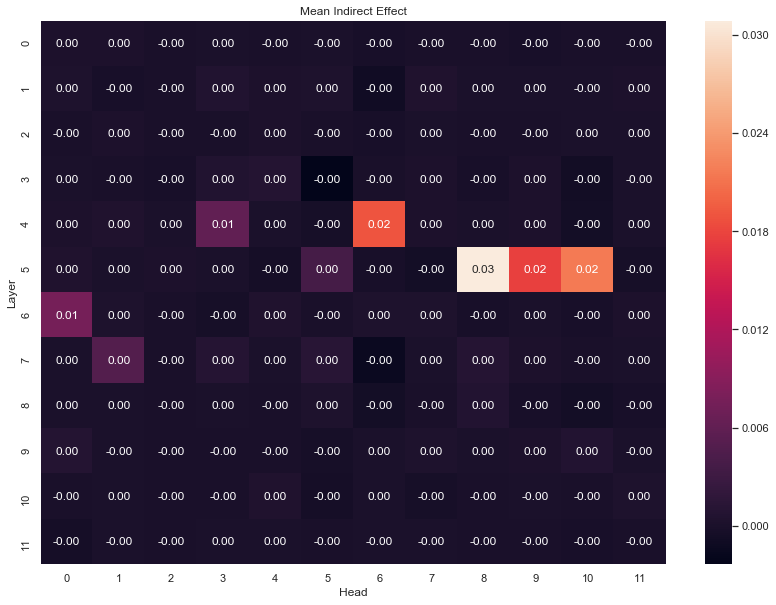

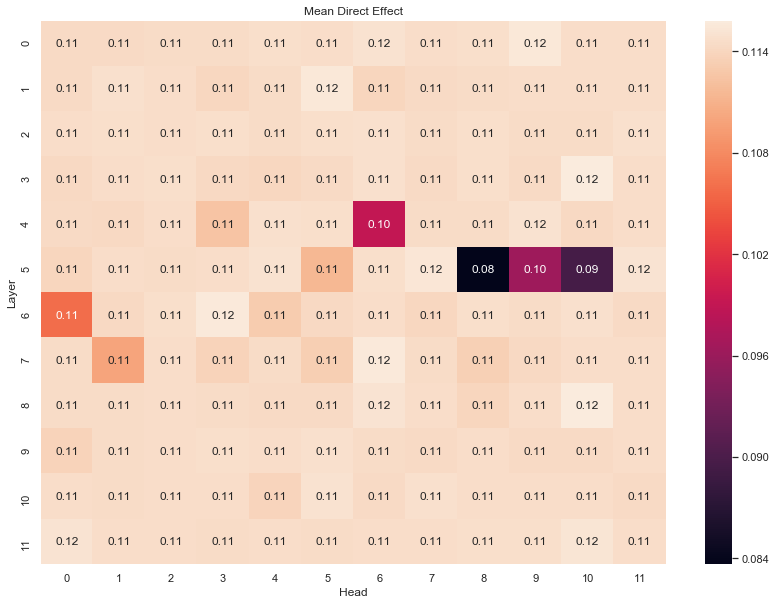

In [4]:
report_interventions_summary_by_head(results)

*** SUMMARY BY LAYER ***
Num interventions: 160
Mean total effect: 0.115


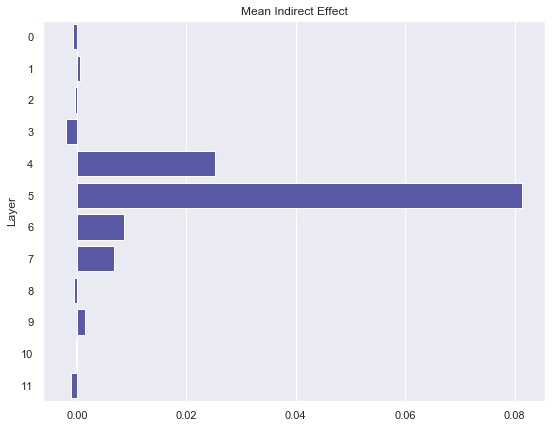

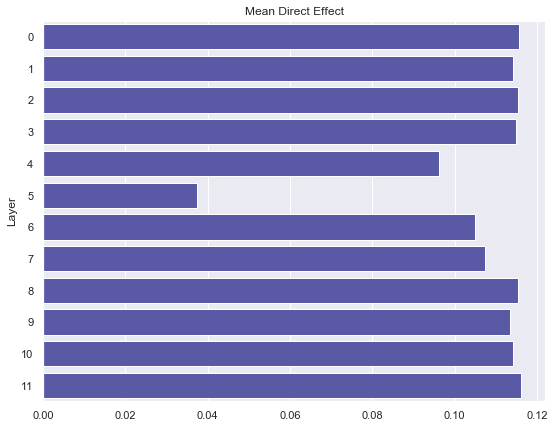

In [5]:
report_interventions_summary_by_layer(results)

### Examples
	

x : The mover said thank you to the housekeeper because she
x': The mover said thank you to the housekeeper because he
c1: cleaned the truck .
c2: is grateful .

p(c2|x) / p(c1|x) = 1.35203
p(c2|x') / p(c1|x') = 1.23162

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = -0.089


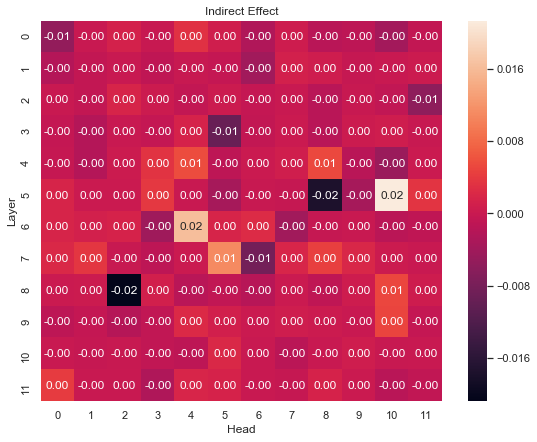

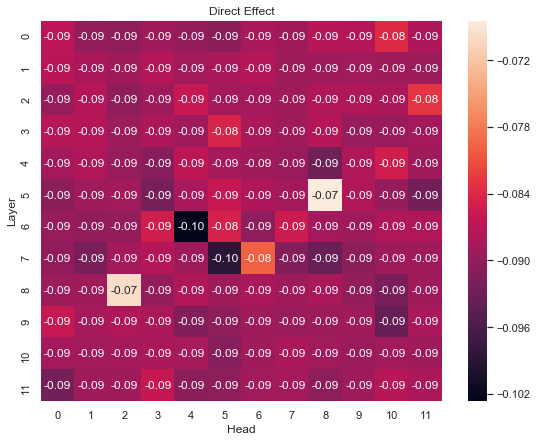

In [6]:
report_intervention(results[0])

x : The assistant scanned documents for the analyst because she
x': The assistant scanned documents for the analyst because he
c1: knows how to use the scan machine .
c2: asked .

p(c2|x) / p(c1|x) = 0.21893
p(c2|x') / p(c1|x') = 0.23095

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.055


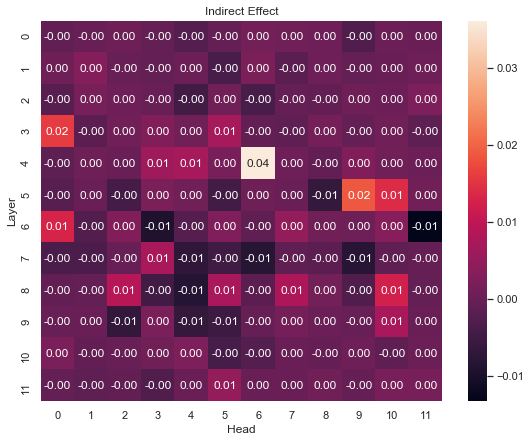

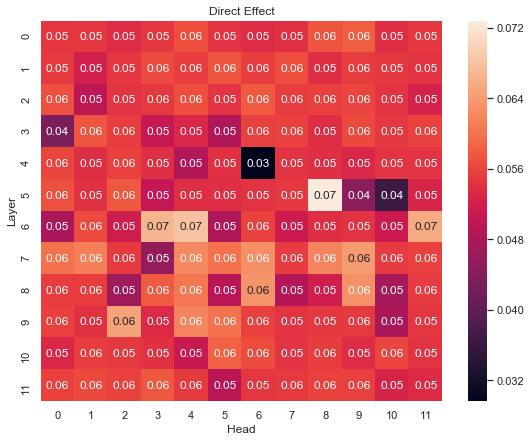

In [7]:
report_intervention(results[1])

x : The chief gave the housekeeper a tip because she
x': The chief gave the housekeeper a tip because he
c1: was helpful .
c2: was satisfied .

p(c2|x) / p(c1|x) = 0.86830
p(c2|x') / p(c1|x') = 1.04330

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.202


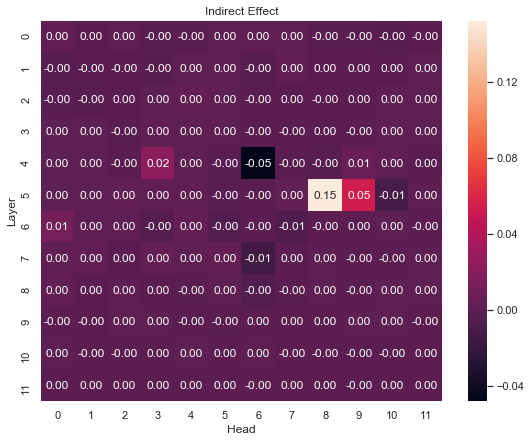

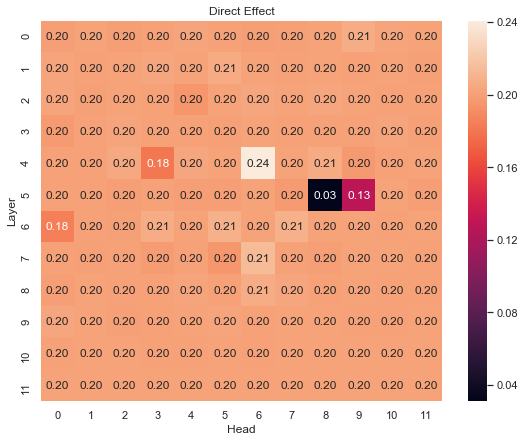

In [8]:
report_intervention(results[2])

x : The lawyer yelled at the hairdresser because she
x': The lawyer yelled at the hairdresser because he
c1: did a bad job .
c2: was mad .

p(c2|x) / p(c1|x) = 0.38992
p(c2|x') / p(c1|x') = 0.40758

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.045


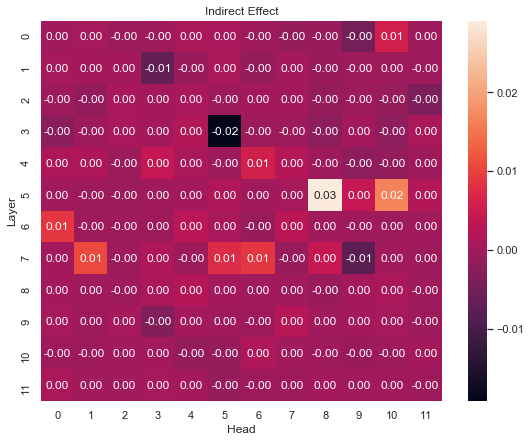

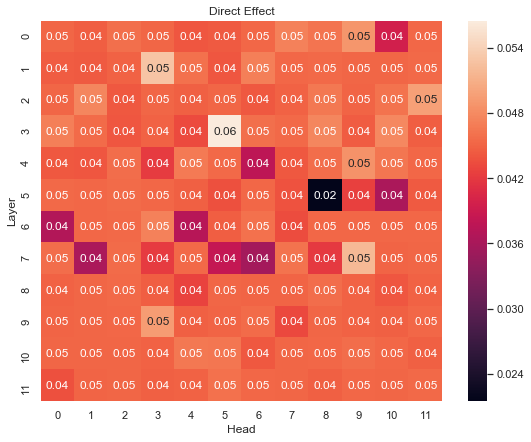

In [9]:
report_intervention(results[3])
